In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_mopak import Parser

In [3]:
# Coastal Endurance Washington Shelf Surface Mooring Buoy MOPAK data
baseurl = "https://rawdata.oceanobservatories.org/files/CE07SHSM/D00003/cg_data/dcl11/mopak/"
fname = "20160505_220005.mopak.log"

# initialize the Parser object for MOPAK
mopak = Parser(baseurl + fname)
r = requests.get(mopak.infile, verify=True) # use verify=False for expired certificate

In [4]:
mopak.raw = r.content
len(mopak.raw), mopak.raw[:5]

(513678, b'\xcb=f\xbb`')

In [5]:
mopak.parse_data()
mopak.data.keys()

dict_keys(['timer', 'acceleration_z', 'time', 'acceleration_y', 'magnetometer_x', 'magnetometer_y', 'angular_rate_z', 'magnetometer_z', 'acceleration_x', 'angular_rate_x', 'angular_rate_y'])

In [6]:
df = pd.DataFrame(mopak.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [7]:
df.shape, df.columns

((11946, 12),
 Index(['acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_rate_x',
        'angular_rate_y', 'angular_rate_z', 'magnetometer_x', 'magnetometer_y',
        'magnetometer_z', 'time', 'timer', 'dt_utc'],
       dtype='object'))

In [8]:
df.dtypes

acceleration_x           float64
acceleration_y           float64
acceleration_z           float64
angular_rate_x           float64
angular_rate_y           float64
angular_rate_z           float64
magnetometer_x           float64
magnetometer_y           float64
magnetometer_z           float64
time                     float64
timer                    float64
dt_utc            datetime64[ns]
dtype: object

In [9]:
df.tail(10)

acceleration_x  acceleration_y  acceleration_z  \
dt_utc                                                                       
2016-05-05 22:19:59.888296       -0.005430        0.042704       -1.045006   
2016-05-05 22:19:59.988296       -0.017207        0.047202       -1.063312   
2016-05-05 22:20:00.088296       -0.029677        0.043938       -1.082298   
2016-05-05 22:20:00.188296       -0.035908        0.038241       -1.099732   
2016-05-05 22:20:00.288296       -0.040765        0.024472       -1.112177   
2016-05-05 22:20:00.388296       -0.041746        0.006197       -1.120037   
2016-05-05 22:20:00.488296       -0.041878       -0.014394       -1.119089   
2016-05-05 22:20:00.588296       -0.044921       -0.032331       -1.111984   
2016-05-05 22:20:00.688296       -0.049843       -0.049711       -1.099116   
2016-05-05 22:20:00.788296       -0.051145       -0.059625       -1.086672   

                            angular_rate_x  angular_rate_y  angular_rate_z  \
dt_utc                                                                       
2016-05-05 22:19:59.888296        0.031155       -0.137247        0.027704   
2016-05-05 22:19:59.988296        0.059731       -0.143670        0.026456   
2016-05-05 22:20:00.088296        0.091781       -0.155313        0.029425   
2016-05-05 22:20:00.188296        0.122760       -0.153670        0.017790   
2016-05-05 22:20:00.288296        0.146258       -0.149758        0.017760   
2016-05-05 22:20:00.388296        0.168002       -0.147708        0.015919   
2016-05-05 22:20:00.488296        0.178329       -0.139971        0.020306   
2016-05-05 22:20:00.588296        0.182332       -0.129649        0.018146   
2016-05-05 22:20:00.688296        0.172993       -0.118371        0.013107   
2016-05-05 22:20:00.788296        0.153726       -0.096972        0.017209   

                            magnetometer_x  magnetometer_y  magnetometer_z  \
dt_utc                                                                       
2016-05-05 22:19:59.888296       -0.081574        0.572853        0.572853   
2016-05-05 22:19:59.988296       -0.075668        0.571807        0.571807   
2016-05-05 22:20:00.088296       -0.069813        0.570695        0.570695   
2016-05-05 22:20:00.188296       -0.063289        0.570856        0.570856   
2016-05-05 22:20:00.288296       -0.056238        0.571095        0.571095   
2016-05-05 22:20:00.388296       -0.049250        0.572169        0.572169   
2016-05-05 22:20:00.488296       -0.042329        0.573373        0.573373   
2016-05-05 22:20:00.588296       -0.036602        0.575260        0.575260   
2016-05-05 22:20:00.688296       -0.029747        0.577821        0.577821   
2016-05-05 22:20:00.788296       -0.024397        0.579815        0.579815   

                                    time        timer  \
dt_utc                                                  
2016-05-05 22:19:59.888296  1.462487e+09  1194.635296   
2016-05-05 22:19:59.988296  1.462487e+09  1194.735296   
2016-05-05 22:20:00.088296  1.462487e+09  1194.835296   
2016-05-05 22:20:00.188296  1.462487e+09  1194.935296   
2016-05-05 22:20:00.288296  1.462487e+09  1195.035296   
2016-05-05 22:20:00.388296  1.462487e+09  1195.135296   
2016-05-05 22:20:00.488296  1.462487e+09  1195.235296   
2016-05-05 22:20:00.588296  1.462487e+09  1195.335296   
2016-05-05 22:20:00.688296  1.462487e+09  1195.435296   
2016-05-05 22:20:00.788296  1.462487e+09  1195.535296   

                                               dt_utc  
dt_utc                                                 
2016-05-05 22:19:59.888296 2016-05-05 22:19:59.888296  
2016-05-05 22:19:59.988296 2016-05-05 22:19:59.988296  
2016-05-05 22:20:00.088296 2016-05-05 22:20:00.088296  
2016-05-05 22:20:00.188296 2016-05-05 22:20:00.188296  
2016-05-05 22:20:00.288296 2016-05-05 22:20:00.288296  
2016-05-05 22:20:00.388296 2016-05-05 22:20:00.388296  
2016-05-05 22:20:00.488296 2016-05-05 22:20:00.488296  
2016-05-05 22:20:00.588296 2

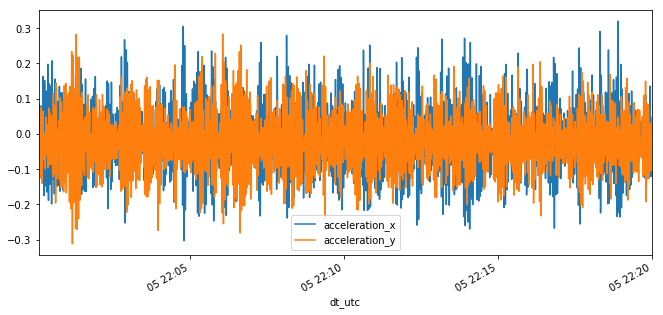

In [10]:
df[['acceleration_x', 'acceleration_y']].plot(figsize=(11,5));

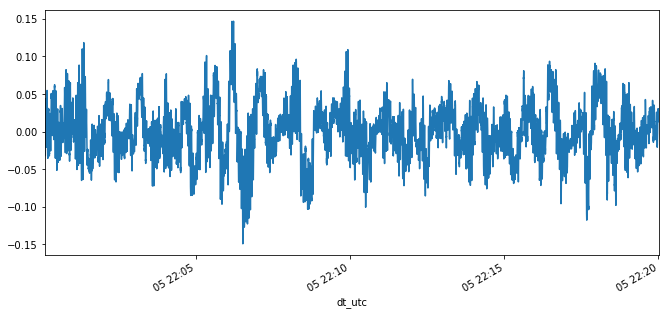

In [11]:
df['angular_rate_z'].plot(figsize=(11,5));